# AccelerateAI
## Data Science Global Bootcamp
### Assignment 06
#### By Eunice

# Question1

## MLR with 2 or more variables – Machine tools company

Benedrix, a machine tool company is interested in understand the impact of machine hours and production run, on its overhead cost.The data on a monthly basis for 3 years is provided in the dataset:
MLR_FactoryOverhead.csv

Fit the regression equations:
• Overhead = F (machine hours)
• Overhead = F (production runs)
• Overhead = F (machine hours, production runs)
1) Find the R-Squared in all 3 cases.
2) How would you explain the additional lift in R-squared of the combined model vs
each of the individual model?

In [118]:
import numpy as np
import pandas as pd 
from scipy.stats.mstats import zscore

import seaborn as sbn 
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [119]:
# Load the dataset
MLRFactory_df = pd.read_csv("MLR_FactoryOverhead.csv")
MLRFactory_df.head(5)

,Month,Machine Hours,Production Runs,Overhead Cost
0,1,1539,31,99798
1,2,1284,29,87804
2,3,1490,27,93681
3,4,1355,22,82262
4,5,1500,35,106968


In [19]:
MLRFactory_df.tail(5)

,Month,Machine Hours,Production Runs,Overhead Cost
31,32,1536,28,102419
32,33,1678,41,117183
33,34,1723,35,107828
34,35,1413,30,88032
35,36,1390,54,117943


In [6]:
# Training a linear regression model1 Overhead = F (machine hours)
Y = MLRFactory_df["Overhead Cost"]

X = MLRFactory_df[['Machine Hours']]
X = sm.add_constant(X) # adding a constant

reg_model1 = sm.OLS(Y,X).fit()
print(reg_model1.summary())  

                            OLS Regression Results                            
Dep. Variable:          Overhead Cost   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     22.60
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           3.57e-05
Time:                        20:36:59   Log-Likelihood:                -376.13
No. Observations:                  36   AIC:                             756.3
Df Residuals:                      34   BIC:                             759.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.862e+04   1.07e+04      4.533

In [7]:
# Training a linear regression model2 Overhead = F (production runs)
Y = MLRFactory_df["Overhead Cost"]

X = MLRFactory_df[['Production Runs']]
X = sm.add_constant(X) # adding a constant

reg_model2 = sm.OLS(Y,X).fit()
print(reg_model2 .summary())  

                            OLS Regression Results                            
Dep. Variable:          Overhead Cost   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     12.64
Date:                Sun, 04 Sep 2022   Prob (F-statistic):            0.00114
Time:                        20:37:35   Log-Likelihood:                -379.62
No. Observations:                  36   AIC:                             763.2
Df Residuals:                      34   BIC:                             766.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7.561e+04   6808.611     

In [8]:
# Training a linear regression combined model Overhead = F (machine hours, production runs)
Y = MLRFactory_df["Overhead Cost"]

X = MLRFactory_df[['Production Runs', 'Machine Hours']]
X = sm.add_constant(X) # adding a constant

reg_modelCombined = sm.OLS(Y,X).fit()
print(reg_modelCombined.summary())  

                            OLS Regression Results                            
Dep. Variable:          Overhead Cost   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     107.0
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           3.75e-15
Time:                        20:37:53   Log-Likelihood:                -349.07
No. Observations:                  36   AIC:                             704.1
Df Residuals:                      33   BIC:                             708.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3996.6782   6603.651     

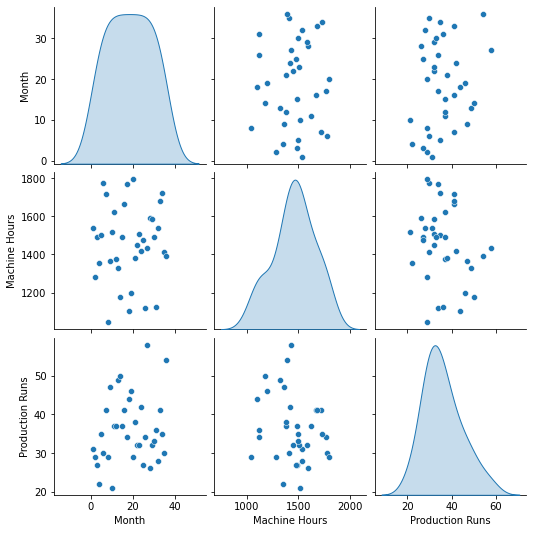

In [18]:
sbn.pairplot(MLRFactory_df.drop(columns="Overhead Cost"), diag_kind='kde')

In [20]:
MLRFactory_df.drop(columns="Overhead Cost").corr()

,Month,Machine Hours,Production Runs
Month,1.000000,0.037230,0.192256
Machine Hours,0.037230,1.000000,-0.229093
Production Runs,0.192256,-0.229093,1.000000


How would you explain the additional lift in R-squared of the combined model vs each of the individual model?
- We see that there is not much correlation between the other varaiables.
- with the P-values on the combined model we also see that both  varaiable have pvalues less than 0.05 meaning they can predic Y well. 
- In general when a variable id added in the prdiction the R squared always increase because of the calulation woth the least squares equation
- in this case there is a signigicant increase compared to both cases where we used only one varaiable. This high lif means that both varaiable will better predict machine hours and production hours will predic the overheaf cost weel than each varaible separatly. if the increase was noy that much we coudl have an indeication that one varaiable can do well in predicting the pverhead cost. 


# Question2

## Q2. MLR with categorical variables – Courier Service

GoKart is a regional delivery service company providing different types of package
delivery services. An analyst wants to *estimate the cost of shipping a package as function of cargo type*.
Cost of 15 randomly chosen packages of approximately the same weight, shipped to
almost similar distance, is provided in the file: MLR_CourierService.csv
1. Estimate the appropriate multiple linear regression equation to predict the cost of shipping a package.
2. Provide interpretation for the regression coefficients.
3. Which cargo type is the costliest? Which one is least costly?
4. How well does the regression fit the sample data? How can the goodness of fitness be improved
5. Predict the cost of shipping a package with semi-fragile cargo


In [120]:
import numpy as np
import pandas as pd 

import seaborn as sbn 
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [121]:
# Load the dataset
CourierService_df = pd.read_csv("MLR_CourierService.csv")
CourierService_df.head(1)

,Shipment,CargType,CosoShipment
0,1,Semifragile,84.0


In [122]:
CourierService_df.describe()

,Shipment,CosoShipment
count,15.000000,15.000000
mean,8.000000,99.840000
std,4.472136,56.250623
min,1.000000,15.600000
25%,4.500000,59.400000
50%,8.000000,102.000000
75%,11.500000,135.600000
max,15.000000,206.400000


In [123]:
CourierService_df["CargType"].value_counts()

Semifragile    5
Durable        5
Fragile        5
Name: CargType, dtype: int64

##  1. Estimate the appropriate multiple linear regression equation to  predict the cost of shipping a package

In [124]:

#fixing the categorical data 

#CourierService_Cat_df=pd.get_dummies(CourierService_df["CargType"],prefix="CargType",drop_first=True)
#add the categorical data to the other varaiables
#CourierService_Cat_df.sample (2)
Y=CourierService_df["CosoShipment"]
X=pd.get_dummies(CourierService_df["CargType"],prefix=True, drop_first=True)
X = sm.add_constant(X)
CourierService_model = sm.OLS(Y,X).fit()
print(CourierService_model.summary ())

                            OLS Regression Results                            
Dep. Variable:           CosoShipment   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     20.61
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           0.000132
Time:                        12:54:49   Log-Likelihood:                -70.043
No. Observations:                  15   AIC:                             146.1
Df Residuals:                      12   BIC:                             148.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               39.1200     12.903  

C:\Users\UKING14\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
##  2. Provide interpretation for the regression coefficients 
The regression coefficients is about 77% 

In [ ]:
##  3.Which cargo type is the costliest? Which one is least costly?

In [ ]:
## 4. How well does the regression fit the sample data? How can the goodness of fitness be improved

In [88]:
## 5. Predict the cost of shipping a package with semi-fragile cargo

cargo_info = {
    'const' : 1,
    'True_Fragile' :0,
    'True_Semifragile' : 1,
    
    }
  
x = pd.DataFrame(cargo_info, index=[0])
predict_semiF=CourierService_model.predict(x)
print("The Predicted cost  of fragile cargo is ",predict_semiF[0].round(1))

Predicted cosyf of fragile cargo:$ 104.4


# Question 3
An HR analyst in Unitech Pvt Ltd, wants to predict the annual salaries of given employees using the potential explanatory variables in the file MLR_EmpSalary.csv

1) Estimate the appropriate multiple linear regression equation to predict the salary of an Unitech employee using all explanatory variables.

2) Do we need to exclude certain columns? Why?

3) Which department employees are paid the highest? By how much?

4) Do you see any discrimination in salaries earned by male and female employees?

5) What would be the estimated salary of a Data Scientist (joining engineering) with 10 years of work experience. This woman has 18 years of total education, and will be supervising 4 junior employees.

##  1. Estimate the appropriate multiple linear regression equation to predict the salary of an Unitech employee using all explanatory variables

In [278]:
# required libraries 
import numpy as np                  # math calculations
import pandas as pd                 # loading data
import statsmodels.api as sm        # modeling 
import seaborn as sbn               # visualization 

In [279]:
# Read the EmpSalary dataset 
Empsalary_df = pd.read_csv("MLR_EmpSalary.csv")       
Empsalary_df.head(5) 

,Employee,Salary,PreviousExp,YearsEmployed,YearsEducation,DirectRepotees,Female,Male,Engineering,Sales,Other
0,1,"$65,487",0,27,22,44,0,1,1,0,0
1,2,"$46,184",3,20,14,1,1,0,1,0,0
2,3,"$32,782",1,0,17,0,1,0,0,1,0
3,4,"$54,899",5,12,18,0,0,1,1,0,0
4,5,"$34,869",5,7,14,1,0,1,1,0,0


In [280]:
#we first
Empsalary_df.dtypes

Employee           int64
Salary            object
PreviousExp        int64
YearsEmployed      int64
YearsEducation     int64
DirectRepotees     int64
Female             int64
Male               int64
Engineering        int64
Sales              int64
Other              int64
dtype: object

In [281]:
#Droping categorical varaiable to avoid multiplecollinearity
X = Empsalary_df.drop(["Employee", "Salary","Female", "Other"], axis=1)
# Make salary  numeric datatype

X.sample(2)

,PreviousExp,YearsEmployed,YearsEducation,DirectRepotees,Male,Engineering,Sales
45,3,1,12,0,1,1,0
19,9,19,14,6,0,0,0


In [282]:

Empsalary_df = pd.read_csv("MLR_EmpSalary.csv")  
Empsalary_df["Salary"] = Empsalary_df["Salary"].apply(lambda x: int(x.replace('$','').replace(',','')))


In [283]:
# we will start with a model that has all the varaibles and then  remove the variable wiht  high p-value

Y = Empsalary_df["Salary"]
Xall = sm.add_constant(X)

modelall = sm.OLS(Y, Xall).fit()
print(modelall.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     29.78
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           1.48e-13
Time:                        15:50:10   Log-Likelihood:                -449.82
No. Observations:                  46   AIC:                             915.6
Df Residuals:                      38   BIC:                             930.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.021e+04   4823.587      2.

In [213]:
Xall.sample(2)

,const,PreviousExp,YearsEmployed,YearsEducation,DirectRepotees,Male,Engineering,Sales
4,1.0,5,7,14,1,1,1,0
8,1.0,6,5,11,0,0,0,1


In [284]:
#I intentionaly did not check for multicolineraiy first to see
#if I will be able to discart that varaiable too

#The p-value of previous experience is  0.761 which greather than 0.05 we remove PreviousExp  from 
#the model and fit the model again
# we drop previous experience 

#X_PreviousExp_removed = Xall.drop("PreviousExp", axis=1, inplace=True)
X_PreviousExp_removed = Xall.drop(columns="PreviousExp", axis=1)

#X_PreviousExp_removed.sample(2)

In [285]:
Y = Empsalary_df["Salary"]

In [286]:
X_PreviousExp_removed.head()

,const,YearsEmployed,YearsEducation,DirectRepotees,Male,Engineering,Sales
0,1.0,27,22,44,1,1,0
1,1.0,20,14,1,0,1,0
2,1.0,0,17,0,0,0,1
3,1.0,12,18,0,1,1,0
4,1.0,7,14,1,1,1,0


In [287]:

modelprv_Removed = sm.OLS(Y, X_PreviousExp_removed).fit()
print(modelprv_Removed.summary())





                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     35.56
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           2.47e-14
Time:                        15:50:39   Log-Likelihood:                -449.88
No. Observations:                  46   AIC:                             913.8
Df Residuals:                      39   BIC:                             926.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           9871.4229   4638.916      2.

In [288]:
#Engineering to be removed and model fit again
X_Eng_removed = X_PreviousExp_removed.drop(columns="Engineering", axis=1)



In [289]:
X_Eng_removed.head(2)

,const,YearsEmployed,YearsEducation,DirectRepotees,Male,Sales
0,1.0,27,22,44,1,0
1,1.0,20,14,1,0,0


In [290]:
Y = Empsalary_df["Salary"]

In [222]:
modelEng_Removed = sm.OLS(Y, X_Eng_removed).fit()
print(modelEng_Removed.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     42.93
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           4.83e-15
Time:                        13:58:16   Log-Likelihood:                -450.25
No. Observations:                  46   AIC:                             912.5
Df Residuals:                      40   BIC:                             923.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.052e+04   4546.822      2.

In [ ]:
#male  with high p value to be reoved and model fit again

In [291]:
X_Male_removed = X_Eng_removed.drop(columns="Male", axis=1)

In [227]:
X_Male_removed.head(2)

,const,YearsEmployed,YearsEducation,DirectRepotees,Sales
0,1.0,27,22,44,0
1,1.0,20,14,1,0


In [298]:
modelMale_Removed = sm.OLS(Y,X_Male_removed).fit()
print(modelMale_Removed.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     52.39
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           1.39e-15
Time:                        15:59:24   Log-Likelihood:                -451.19
No. Observations:                  46   AIC:                             912.4
Df Residuals:                      41   BIC:                             921.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8918.7405   4411.105      2.

In [231]:
 # Check for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(X_Male_removed.values, i) 
               for i in range(X_Male_removed.shape[1])], 
               index=X_Male_removed.columns)

const             41.190765
YearsEmployed      1.595104
YearsEducation     1.878616
DirectRepotees     1.357537
Sales              1.011412
dtype: float64

In [ ]:
Question ? does ot make a difference the check multicollinearity before ? since now there not much of multicollinearity
bewteen the independant variable only the the constant value . 


In [232]:
#try to drop the constant and reschecck 
X_Male_constant  = X_Male_removed.drop(columns="const", axis=1)



In [233]:
X_Male_constant .head(2)

,YearsEmployed,YearsEducation,DirectRepotees,Sales
0,27,22,44,0
1,20,14,1,0


In [234]:
 # Check for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(X_Male_constant.values, i) 
               for i in range(X_Male_constant.shape[1])], 
               index=X_Male_constant.columns)

YearsEmployed     4.032763
YearsEducation    4.263188
DirectRepotees    1.559763
Sales             1.284516
dtype: float64

In [235]:
#year of education has the hoghest value will remove from the model amd train again 
X_YEd_removed = X_Male_removed.drop(columns="YearsEducation", axis=1)
X_YEd_removed.head(2)


,const,YearsEmployed,DirectRepotees,Sales
0,1.0,27,44,0
1,1.0,20,1,0


In [236]:
modelYEd_removed = sm.OLS(Y,X_YEd_removed).fit()
print(modelYEd_removed.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     40.10
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           2.15e-12
Time:                        14:17:27   Log-Likelihood:                -461.73
No. Observations:                  46   AIC:                             931.5
Df Residuals:                      42   BIC:                             938.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.962e+04   1513.081     19.

In [ ]:
As I removed the year of education my R saquarred decreased ?? shoud I keep it instead ? 
shoud we check for multipleColiearity before or after? 


2) Do we need to exclude certain columns? Why?
Note I still have to master other conditions ...
Based on the Pvalues we can removed the previous experinece, male amd emgineering because they do not change the R squarred that much when thet are removed from the model. 
Unlike the example we did in class I will not remove years of education that quickly I need to further explore it because it decreases the squared when removed from the model. 


3) Which department employees are paid the highest? By how much?

yes we shoud remove some such as the 

In [238]:
Empsalary_df = pd.read_csv("MLR_EmpSalary.csv")  
Empsalary_df["Salary"] = Empsalary_df["Salary"].apply(lambda x: int(x.replace('$','').replace(',','')))
Empsalary_df.sample(2)

#I am not sure how to answer the question I am justiking the category that has the gihest pay

,Employee,Salary,PreviousExp,YearsEmployed,YearsEducation,DirectRepotees,Female,Male,Engineering,Sales,Other
10,11,23654,0,0,10,2,0,1,0,0,1
15,16,35468,5,9,14,5,0,1,0,0,1


In [247]:
EmpsalaryEng_df.query("Engineering")['Salary'].max()

46184

In [248]:
EmpsalaryEng_df.query("Sales")['Salary'].max()

65487

In [258]:
EmpsalaryEng_df.query("Other")['Salary'].max()

65487

4) Do you see any discrimination in salaries earned by male and female employees?


In [269]:
import seaborn as sn 


<AxesSubplot:xlabel='Female', ylabel='Salary'>

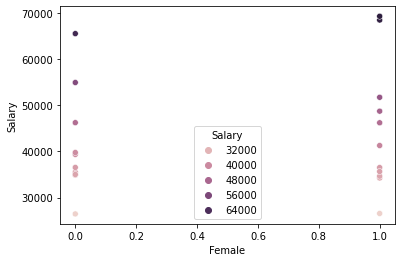

In [265]:
sn.scatterplot(x=EmpsalaryEng_df["Female"],y=EmpsalaryEng_df["Salary"], hue =EmpsalaryEng_df["Salary"] )

<AxesSubplot:xlabel='Male', ylabel='Salary'>

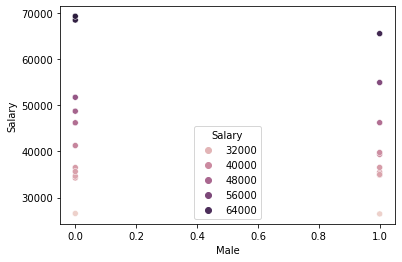

In [268]:
sn.scatterplot(x=EmpsalaryEng_df["Male"],y=EmpsalaryEng_df["Salary"], hue =EmpsalaryEng_df["Salary"])

In [ ]:
It seems like femal do receive high salary there is some outliers but most of the femals make under 40 000 and few go between 40 000 and 550000. 

1) What would be the estimated salary of a Data Scientist (joining engineering) with 10 years of work experience. This woman has 18 years of total education, and will be supervising 4 junior employees.

In [299]:
ew_emp = {
    'const' : 1,
    'YearsEmployed' :10,
    'YearsEducation':0,
    'DirectRepotees' : 4,
    'Sales'  : 0 
    }
  
x = pd.DataFrame(new_emp, index=[0])

predicted_sal = modelMale_Removed.predict(x)

print("Predicted Salary:$",predicted_sal[0].round(1))

#	const	YearsEmployed	YearsEducation	DirectRepotees	Sales
#my model has 5 variabkes but it does not work

ValueError: shapes (1,4) and (5,) not aligned: 4 (dim 1) != 5 (dim 0)

# Question 4 MLR with Interaction effect – Stock Price Prediction

Stock market analyst are continually looking for reliable predictors of stock price.
Consider the problem of modelling the stock price of Utility companies. Two variable
that are though to influence the stock price(Y) are return of average equity (ROE) and
annual dividend rate.
Data for 16 utility stocks are provided in the file MLR_StockPrice.csv

1) Estimate the MLR equation from the given dataset
2) Interpret the Adjusted R-Squared value and each of the coefficients
3) Revise the Stock Price prediction model for utility companies, to include and interaction term between ROE and Annual dividend rate. Does this new model fit the data better than was done in Problem 10.

1) Estimate the MLR equation from the given dataset


In [5]:

import numpy as np
import pandas as pd 
from scipy.stats.mstats import zscore

import seaborn as sbn 
import matplotlib.pyplot as plt

import statsmodels.api as sm
# Lets see the dataset
StockPrice1_df = pd.read_csv("MLR_StockPrice.csv")
StockPrice1_df.head()


,Electric Utility,Stock Price,ROE,Dividend
0,1,$23,13.7,2.36
1,2,$34,12.8,3.12
2,3,$20,6.9,2.48
3,4,$24,12.7,2.36
4,5,$20,15.3,1.92


In [6]:
# Make Stock Price  numeric datatype
StockPrice1_df["Stock Price"] = StockPrice1_df["Stock Price"].apply(lambda x: int(x.replace('$','').replace(',',''))) 


StockPrice1_df["Stock Price"]


0     23
1     34
2     20
3     24
4     20
5     13
6     33
7     15
8     26
9     25
10    26
11    20
12    28
13    25
14    30
15    20
Name: Stock Price, dtype: int64

In [7]:
Y_stockPrice = StockPrice1_df["Stock Price"]
X_stockPrice = StockPrice1_df[["ROE","Dividend"]]
X_stockPrice = sm.add_constant(X_stockPrice) # adding a constant

X_stockPrice.sample(1)


,const,ROE,Dividend
2,1.0,6.9,2.48


In [8]:
stockPrice_model = sm.OLS(Y_stockPrice ,X_stockPrice).fit()

print(stockPrice_model.summary()) 

                            OLS Regression Results                            
Dep. Variable:            Stock Price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     84.31
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           3.60e-08
Time:                        17:02:44   Log-Likelihood:                -29.298
No. Observations:                  16   AIC:                             64.60
Df Residuals:                      13   BIC:                             66.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.9537      3.405     -2.923      0.0

C:\Users\UKING14\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


2) Interpret the Adjusted R-Squared value and each of the coefficients


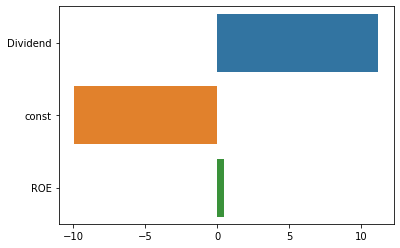

In [9]:
coeff = stockPrice_model.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sbn.barplot(x=coeff.values, y=coeff.index, orient='h');

In [ ]:
The devident has 10 tims more impact on the stock price...

3) Revise the Stock Price prediction model for utility companies, to include and interaction term between ROE and Annual dividend rate. Does this new model fit the data better than was done in Problem 10